In [1]:
%load_ext autoreload
%autoreload 2

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time
import sys
sys.path.append("../../")
from src.util import operators
from src.util.stochastic_expectation_value import compute_stochastic_expectation_value_nonlinear as compute_exp_val_nonlinear
from src.util.stochastic_expectation_value import compute_stochastic_expectation_value_linear as compute_exp_val_linear
from src.util import bath_correlation_function
from src.util import debye_spectral_density  
from src.homps import homps
from src.util import operators
from src.util import noise_generator

In [47]:
# Parameters for the spin-boson model
epsilon = 2.0
delta = -2.0
# Parameters for the Debye spectral density
beta = 50.0
T = 1/beta
gamma = 5.0
eta = 0.5
# operators
sigma_x, sigma_z, eye = operators.generate_physical_operators()
L = sigma_z
h = operators.generate_spin_boson_hamiltonian(delta=delta, epsilon=epsilon)
# time window
duration = 30

In [48]:
## Parameters for the spin-boson model
#epsilon = 2.0
#delta = -2.0
## Parameters for the Debye spectral density
#beta = 0.5
#T = 1/beta
#gamma = 0.25
#eta = 0.5
## operators
#sigma_x, sigma_z, eye = operators.generate_physical_operators()
#L = sigma_z
#h = operators.generate_spin_boson_hamiltonian(delta=delta, epsilon=epsilon)
## time window
#duration = 30

In [49]:
g, w = debye_spectral_density.get_debye_coefficients(5000, T, gamma, eta)

In [50]:
N_steps = 6000
N_trunc = 9
N_terms = 14
N = 10000
w_cut = 500

In [51]:
J = lambda w : debye_spectral_density.debye_spectral_density(w, eta, gamma)

In [52]:
options = {
    'linear' : False,
    'use_noise' : True,
    'chi_max' : 10,
    'eps' : 1.e-3,
    'method' : 'RK4',
    'noise_generator' : noise_generator.ColoredNoiseGenerator_SumApprox(J, 0, duration, N, w_cut, beta)
}

In [53]:
my_homps = homps.HOMPS_Engine(g[:N_terms], w[:N_terms], h, L, duration, N_steps, N_trunc, options)

In [54]:
psis_100 = my_homps.compute_realizations(100, progressBar=tqdm)

  0%|          | 0/100 [00:00<?, ?it/s]

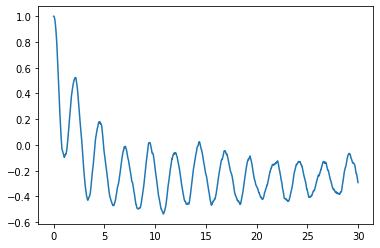

In [56]:
plt.plot(np.linspace(0, duration, N_steps), sigmazs_100)
plt.show()